# SIT742: Modern Data Science 
**(Week 09: Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.
- If you found any issue/bug for this document, please submit an issue at [tulip-lab/sit742](https://github.com/tulip-lab/sit742/issues)

Prepared by **SIT742 Teaching Team**

---



## Session 9A - Unsupervised Learning


The purpose of this session is to demonstrate unsupervised learning algortihms.


## Content

### Part 1 K-Means

1.1 [Generating Random Data](#data)

1.2 [Setting Up K-means](#kmeans)

1.3 [Creating the Visual Plot](#plot)

1.4 [Clustering Iris Data](#iris)


### Part 2 Hierarchical Clustering

2.1 [Generating Random Data](#data2)

2.2 [Agglomerative Clustering](#agc)

2.3 [Dendrogram](#den)
 
### Part 3 Density-based Clustering


### Part 4 Feature Selection

4.1 [Generating Random Data](#data3)

4.2 [Variance Feature Selection](#varfs)

4.3 [UniVariance Feature Selection](#uvarfs)

### Part 5 Dimensionality Reduction and PCA

---

---
## <span style="color:#0b486b">1. K-Means Clustering</span>


### Import the following libraries:
<ul>
    <li> <b>random</b> </li>
    <li> <b>numpy as np</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
    <li> <b>KMeans from sklearn.cluster</b> </li>
    <li> <b>make_blobs from sklearn.datasets.samples_generator</b> </li>
</ul>
<br>
Also run <b> %matplotlib inline </b> since we will be plotting in this section.

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<a id = "data"></a>

### <span style="color:#0b486b">1.1 Generating Random Data</span>

So we will be creating our own dataset!

First we need to set up a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b> <br>ex. random.seed(0)

In [2]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>



In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the randomly generated data.

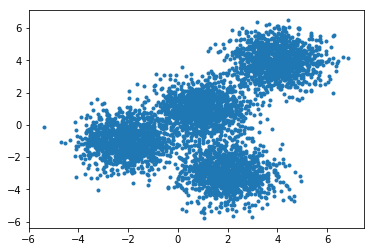

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')


<a id = "kmeans"></a>


### <span style="color:#0b486b">1.2 Setting up K-means</span>

Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n\_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n\_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n\_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b> 

In [7]:
k_means_labels = k_means.labels_

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster&#95;centers&#95; </b> and save it as <b> k_means_cluster_centers </b>

In [8]:
k_means_cluster_centers = k_means.cluster_centers_


<a id = "plot"></a>


### <span style="color:#0b486b">1.3 Creating the Visual Plot</span>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

Please read through the code and comments to understand how to plot the model.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


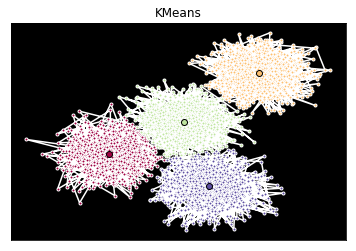

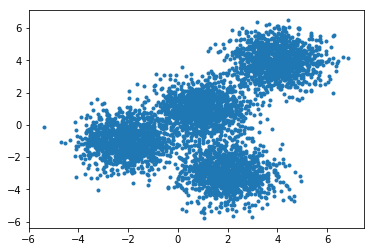

In [9]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot with a black background (background is black because we can see the points
# connection to the centroid.
ax = fig.add_subplot(1, 1, 1, axisbg = 'black')

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[2, 2], [-2, -1], [4, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

# Display the scatter plot from above for comparison.
plt.scatter(X[:, 0], X[:, 1], marker='.')


<a id = "iris"></a>


### <span style="color:#0b486b">1.4 Clustering Iris Data</span>

Import the following libraries: 
<ol>- Axes3D from mpl_toolkits.mplot3d</ol>
<ol>- KMeans from sklearn.cluster</ol>
<ol>- load_iris from sklearn.datasets</ol>

<i>Note: It is presumed that numpy and matplotlib.pyplot are both imported as np and plt respectively from previous imports. If that is not the case, please import them!</i>

In [10]:
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris

Then we will set the <b>random seed</b> and the <b>centers</b> for <b>K-means</b>.

In [11]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

Using the <b> load_iris() </b> function, declare the iris datset as the variable <b>iris</b>

In [12]:
iris = load_iris()

Also declare <b>X</b> as the <b>iris' data component</b>, and y as <b>iris' target component</b>

In [13]:
X = iris.data 
y = iris.target

Now let's run the rest of the code and see what <b>K-Means produces!</b>

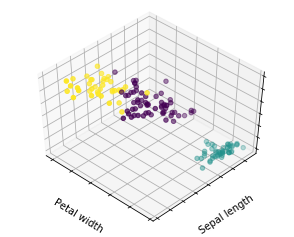

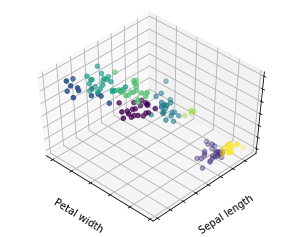

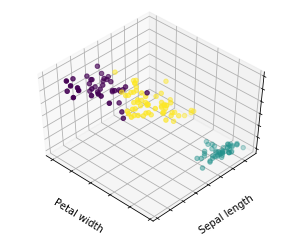

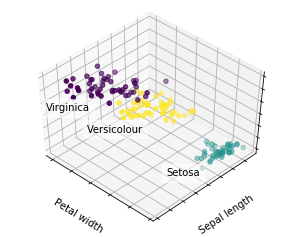

In [14]:
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

The following <b>plots</b> (1-3) show the different <b>end results</b> you obtain by using different <b>initalization processes</b>. <b>Plot 4</b> holds what the answer should be, however it is clear that <b>K-means</b> is <b>heavily reliant</b> on the <b>initalization</b> of the <b>centroid</b>.



---
## <span style="color:#0b486b">2. Hierarchical Clustering</span>


We will be looking at the next clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>

---
Import Libraries:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>ndimage</b> from <b>scipy</b> </li>
    <li> <b>hierarchy</b> from <b>scipy.cluster</b> </li>
    <li> <b>pyplot as plt</b> from <b>matplotlib</b> </li>
    <li> <b>manifold</b> from <b>sklearn</b> </li>
    <li> <b>datasets</b> from <b>sklearn</b> </li>
    <li> <b>AgglomerativeClustering</b> from <b>sklearn</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
</ul> <br>
Also run <b>%matplotlib inline</b> that that wasn't run already.

In [15]:
import numpy as np 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<a id = "data2"></a>

### <span style="color:#0b486b">2.1 Generating Random Data</span>

We will be generating another set of data using the <b>make_blobs</b> class once again. This time you will input your own values! <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X2</b> and <b>y2</b>.

In [16]:
X2, y2 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Plot the scatter plot of the randomly generated data

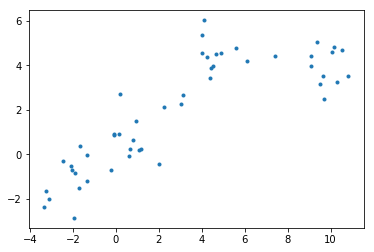

In [17]:
plt.scatter(X2[:, 0], X2[:, 1], marker='.') 

---
<a id = "agc"></a>

### <span style="color:#0b486b">2.2 Agglomerative Clustering</span>

We will start by clustering the random data points we just created.

The <b> AgglomerativeClustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>

In [18]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

Fit the model with <b> X2 </b> and <b> y2 </b> from the generated data above.

In [19]:
agglom.fit(X2,y2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func=<function mean at 0x2b3e3efb8048>)

Run the following code to show the clustering! <br>
Remember to read the code and comments to gain more understanding on how the plotting works.

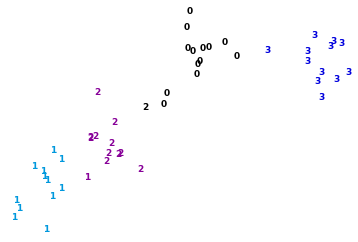

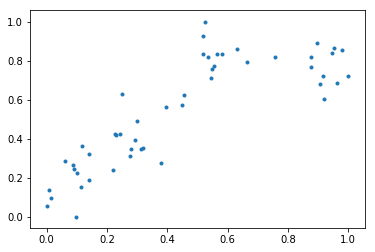

In [20]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X2.
x_min, x_max = np.min(X2, axis=0), np.max(X2, axis=0)

# Get the average distance for X2.
X2 = (X2 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X2.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X2[i, 0], X2[i, 1], str(y2[i]),
             color=plt.cm.spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
plt.axis('off')

# Display the plot
plt.show()

# Display the plot of the original data before clustering
plt.scatter(X2[:, 0], X2[:, 1], marker='.')

---
<a id = "den"></a>

### <span style="color:#0b486b">2.3 Dendrogram</span>


Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X2 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [21]:
dist_matrix = distance_matrix(X2,X2) 
print(dist_matrix)

[[ 0.          0.08750199  0.12373912 ...,  0.72939926  0.14221722
   0.12149305]
 [ 0.08750199  0.          0.17893395 ...,  0.73549091  0.13252706
   0.20675124]
 [ 0.12373912  0.17893395  0.         ...,  0.84295371  0.11197173
   0.16143366]
 ..., 
 [ 0.72939926  0.73549091  0.84295371 ...,  0.          0.8613293
   0.70226941]
 [ 0.14221722  0.13252706  0.11197173 ...,  0.8613293   0.          0.24061935]
 [ 0.12149305  0.20675124  0.16143366 ...,  0.70226941  0.24061935  0.        ]]


Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b>

In [22]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>

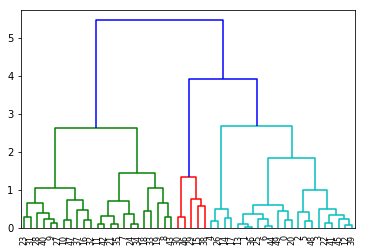

In [23]:
dendro = hierarchy.dendrogram(Z)

---
## <span style="color:#0b486b">3. Density-based Clustering</span>


We will be looking at the next clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>

---
Import Libraries:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>ndimage</b> from <b>scipy</b> </li>
    <li> <b>hierarchy</b> from <b>scipy.cluster</b> </li>
    <li> <b>pyplot as plt</b> from <b>matplotlib</b> </li>
    <li> <b>manifold</b> from <b>sklearn</b> </li>
    <li> <b>datasets</b> from <b>sklearn</b> </li>
    <li> <b>AgglomerativeClustering</b> from <b>sklearn</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
</ul> <br>
Also run <b>%matplotlib inline</b> that that wasn't run already.

In [24]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

The function below will generate the data points and requires these inputs:
<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation between the clusters. The larger the number, the further the spacing. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>

In [25]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

The function below will generate the DBSCAN using the input data:
<ul>
    <li> <b>epsilon</b>: A float that describes the maximum distance between two samples for them to be considered as in the same neighborhood. </li>
    <ul> <li> Example: 0.3 </li> </ul>
    <li> <b>minimumSamples</b>: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. </li>
    <ul> <li> Examples: 7 </li> </ul>
</ul>

In [26]:
def displayDBSCAN(epsilon, minimumSamples):
    
    # Initialize DBSCAN with specified epsilon and min. smaples. Fit the model with feature
    # matrix X
    db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
    
    # Create an array of booleans using the labels from db.
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    
    # Replace all elements with 'True' in core_samples_mask that are
    # in the cluster, 'False' if the points are outliers.
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


    # Black color is removed and used for noise instead.
    
    # Remove repetition in labels by turning it into a set.
    unique_labels = set(labels)
    
    # Create colors for the clusters.
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    # Plot the points with colors
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)
        
        # Plot the datapoints that are clustered
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        # Plot the outliers
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

Use <b>createDataPoints</b> with the <b>3 inputs</b> and store the output into variables <b>X</b> and <b>y</b>.

In [27]:
createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

(array([[-1.20481012,  0.8947502 ],
        [-1.33347483,  0.64553883],
        [ 0.63510302, -1.77670748],
        ..., 
        [ 0.18916549, -1.41081505],
        [-1.11560064,  0.80583478],
        [-0.20255851, -1.16925803]]), array([2, 2, 1, ..., 1, 2, 1]))

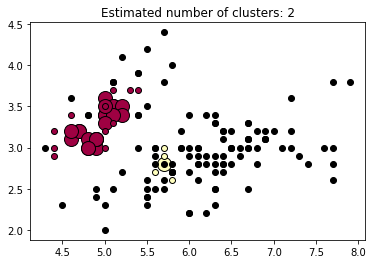

In [28]:
displayDBSCAN(0.3, 7)

---
## <span style="color:#0b486b">4. Feature Selection</span>


In this lab exercise, you will learn how to use <b>Dimensionality Reduction</b> in the form of <b>Feature Selection</b> and <b>Feature Extraction</b>.

We will first be looking at Feature Selection with <b>VarianceThreshold</b>. VarianceThreshold is a useful tool to removing features with a threshold variance. It is a simple and basic Feature Selection.

---
<a id = "data3"></a>

### <span style="color:#0b486b">4.1 Data Set</span>

Now we will be working with the <b>skulls dataset</b> once again. Using the <b>my_data</b> variable and <b>removeColumns</b> function, create a variable called <b>X</b> which has the <b>row column dropped</b>.

In [30]:
!pip install wget

  Running setup.py bdist_wheel for wget ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [31]:
import wget

link_to_data = 'https://github.com/tuliplab/mds/raw/master/Jupyter/data/skulls.csv'
DataSet = wget.download(link_to_data)

In [32]:
import pandas

my_data = pandas.read_csv("skulls.csv", delimiter=",")

In [33]:
# Remove the column containing the target name since it doesn't contain numeric values.
# Also remove the column that contains the row number
# axis=1 means we are removing columns instead of rows.
# Function takes in a pandas array and column numbers and returns a numpy array without
# the stated columns
def removeColumns(pandasArray, *column):
    return pandasArray.drop(pandasArray.columns[[column]], axis=1).values

In [34]:
X = removeColumns(my_data, 0, 1)

Now use the <b>target function</b> to obtain the <b>Response Vector</b> of <b>my_data</b> and store it as <b>y</b>

In [35]:
def target(numpyArray, targetColumnIndex):
    target_dict = dict()
    target = list()
    count = -1
    for i in range(len(my_data.values)):
        if my_data.values[i][targetColumnIndex] not in target_dict:
            count += 1
            target_dict[my_data.values[i][targetColumnIndex]] = count
        target.append(target_dict[my_data.values[i][targetColumnIndex]])
    return np.asarray(target)

In [36]:
y = target(my_data, 1)

---
<a id = "varfs"></a>

### <span style="color:#0b486b">4.2 Variance Feature Selection</span>

First import <b>VarianceThreshold</b> from sklearn.feature_selection

In [37]:
from sklearn.feature_selection import VarianceThreshold

Now let's instantiate <b>VarianceThreshold</b> as a variable called <b>sel</b>

In [38]:
sel = VarianceThreshold()

Now <b>VarianceThreshold</b> removes all <b>zero-variance features</b> by default. These features are any <b>constant value</b> features. Given the dataset below, let's try to run <b>fit_transform</b> function from <b>sel</b> on it.

In [39]:
sel.fit_transform(X)

array([[131, 138,  89,  49],
       [125, 131,  92,  48],
       [131, 132,  99,  50],
       [119, 132,  96,  44],
       [136, 143, 100,  54],
       [138, 137,  89,  56],
       [139, 130, 108,  48],
       [125, 136,  93,  48],
       [131, 134, 102,  51],
       [134, 134,  99,  51],
       [129, 138,  95,  50],
       [134, 121,  95,  53],
       [126, 129, 109,  51],
       [132, 136, 100,  50],
       [141, 140, 100,  51],
       [131, 134,  97,  54],
       [135, 137, 103,  50],
       [132, 133,  93,  53],
       [139, 136,  96,  50],
       [132, 131, 101,  49],
       [126, 133, 102,  51],
       [135, 135, 103,  47],
       [134, 124,  93,  53],
       [128, 134, 103,  50],
       [130, 130, 104,  49],
       [138, 135, 100,  55],
       [128, 132,  93,  53],
       [127, 129, 106,  48],
       [131, 136, 114,  54],
       [124, 138, 101,  46],
       [124, 138, 101,  48],
       [133, 134,  97,  48],
       [138, 134,  98,  45],
       [148, 129, 104,  51],
       [126, 1

Now you should have only <b>two features</b> left. The first and second features were removed since they had a <b>variance</b> of 0. You probably won't encounter constant value features very often, therefore you will want to keep a certain <b>threshold</b>. 


We can change the threshold by adding <b>threshold='threshold value'</b> inside the brackets during the instantiation of <b>VarianceThreshold</b>. Where <b>'threshold value'</b> is equal to <br>

$$ Var(X) = p(1-p) $$

Where <b>'p'</b> is your threshold % in <b>decimal format</b>.

So, for example if I wanted a threshold of <b>60%</b>, I would equate <b>threshold=0.6 * (1 - 0.6)</b>

Now let's instantiate another <b>VarianceThreshold</b> but with a threshold of <b>90%</b>. We'll called it <b>sel90</b>.

In [40]:
sel90 = VarianceThreshold(threshold=(0.9 * (1 - 0.9)))

In [41]:
sel90.fit_transform(X)

array([[131, 138,  89,  49],
       [125, 131,  92,  48],
       [131, 132,  99,  50],
       [119, 132,  96,  44],
       [136, 143, 100,  54],
       [138, 137,  89,  56],
       [139, 130, 108,  48],
       [125, 136,  93,  48],
       [131, 134, 102,  51],
       [134, 134,  99,  51],
       [129, 138,  95,  50],
       [134, 121,  95,  53],
       [126, 129, 109,  51],
       [132, 136, 100,  50],
       [141, 140, 100,  51],
       [131, 134,  97,  54],
       [135, 137, 103,  50],
       [132, 133,  93,  53],
       [139, 136,  96,  50],
       [132, 131, 101,  49],
       [126, 133, 102,  51],
       [135, 135, 103,  47],
       [134, 124,  93,  53],
       [128, 134, 103,  50],
       [130, 130, 104,  49],
       [138, 135, 100,  55],
       [128, 132,  93,  53],
       [127, 129, 106,  48],
       [131, 136, 114,  54],
       [124, 138, 101,  46],
       [124, 138, 101,  48],
       [133, 134,  97,  48],
       [138, 134,  98,  45],
       [148, 129, 104,  51],
       [126, 1

You should only have <b>one feature</b> left. The last column feature was the only feature to have a variance of <b>at least 90%</b>.

---
<a id = "uvarfs"></a>

### <span style="color:#0b486b">4.3 Univariance Feature Selection</span>

Now let's look at <b>Univariance Feature Selection</b>.

We will need to import <b>SelectKBest</b> from <b>sklearn.feature_selection</b>, <b>chi2</b> from <b>sklearn.feature_selection</b>, <b>numpy</b> as <b>np</b>, and <b>pandas</b>.

How <b>Univariance</b> works is that it selects <b>features</b> based on <b>univariance statistical tests</b>. <b>chi2</b> is used as a <b>univariance scoring function</b> which returns <b>p</b> values. We specified <b>k=3</b> for the <b>3 best features</b> to be chosen. Now we will move onto <b>Feature Extraction!</b>

In [42]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import numpy as np 
import pandas

Now take a look at <b>X's shape</b> before the feature selection

In [43]:
X.shape

(150, 4)

Now we will use the <b>fit_transform</b> function with parameters <b>X</b>, <b>y</b> of <b>SelectKBest</b> with parameters <b>chi2</b>, <b>k=3</b>. This will be stored as <b>X_new</b>.
<br><br>
<b>Note</b>: There is a VisibleDeprecationWarning, you can ignore it.

In [44]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)

Now let's check out the shape of <b>X_new</b>, it should have <b>one less</b> feature than before!

In [45]:
X_new.shape

(150, 3)

---
## <span style="color:#0b486b">5. Dimensionality Reduction and PCA</span>

<b>DictVectorizer</b> is a very simple <b>Feature Extraction</b> class as it can be used to <b>convert feature arrays</b> in a <b>dict</b> to <b>NumPy/SciPy</b> representations.

First we will need to import <b>DictVectorizer</b> from <b>sklearn.feature_extraction</b>



In [46]:
from sklearn.feature_extraction import DictVectorizer

We will use the following <b>dictionary</b> to be <b>converted</b>.

In [47]:
dataset = [
...     {'Day': 'Monday', 'Temperature': 18},
...     {'Day': 'Tuesday', 'Temperature': 13},
...     {'Day': 'Wednesday', 'Temperature': 7},
... ]

Now create an <b>instance</b> of <b>DictVectorizer</b> called <b>vec</b>

In [48]:
vec = DictVectorizer()

Now we will use the <b>fit_transform</b> function of <b>vec</b> with the parameter <b>dataset</b> and use the <b>.toarray()</b> on the final product

In [49]:
vec.fit_transform(dataset).toarray()

array([[  1.,   0.,   0.,  18.],
       [  0.,   1.,   0.,  13.],
       [  0.,   0.,   1.,   7.]])

Now we can see that our <b>dataset</b> has been <b>converted</b> into an <b>array format</b> but pertaining its <b>data</b>. We can further review the <b>data</b> with the <b>get_feature_names</b> function of <b>vec</b>.

In [50]:
vec.get_feature_names()

['Day=Monday', 'Day=Tuesday', 'Day=Wednesday', 'Temperature']

Now we will use <b>PCA</b> to represent the <b>data</b> we used in feature selection(<b>X_new</b>) and project it's dimensions so make sure you have completed that portion! But first we must import <b>matplotlib.pyplot</b> as <b>plt</b>, <b>Axes3D</b> from <b>mpl_toolkits.mplot3d</b>, and <b>decomposition</b> from <b>sklearn</b>. <i>(And numpy as np if you haven't already!)</i> Make sure you include the <b>%matplotlib inline</b> to have the plot show up in your notebook!

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
%matplotlib inline

Now we will just create instances of <b>plt.figure</b> as <b>fig</b> and <b>Axes3D</b> as <b>ax</b> with the following dimensions. In this case we specificed dimensions where <b>elev=0</b> and <b>azim=0</b> to see the graph from where the <b>z plane = 0</b>. This will be useful to <b>visualize</b> the <b>difference</b> later on.

<i> Note: You can change the elev and azim later on to see the graph in different ways. But it is suggested to keep it as is for now.</i>

We will plot <b>X_new</b> against <b>y</b> with the <b>scatter</b> function of <b>ax</b>. The <b>scatter</b> function will include all of <b>X_new's column data</b> (each as a seperate parameter), <b>c=y</b>, and <b>cmap=plt.cm.spectral</b> as below.

<b>Note</b>: You can ignore the FutureWarning.

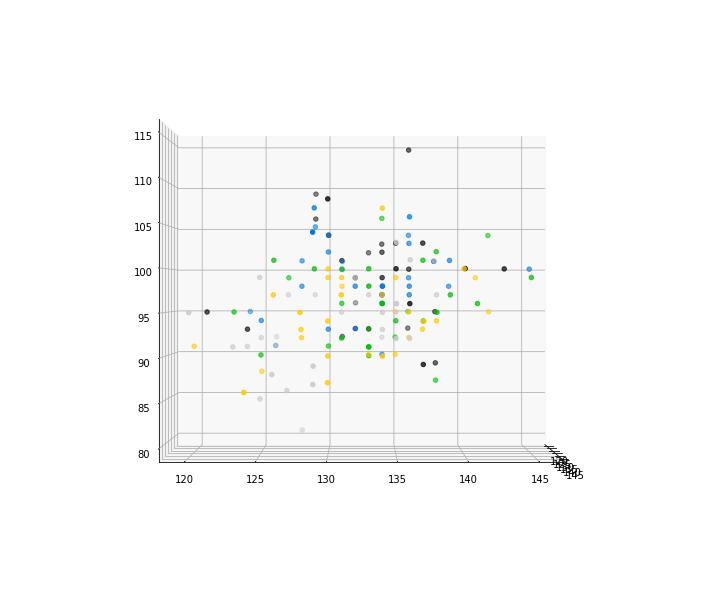

In [52]:
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=plt.cm.spectral)

Now you know what a <b>3D representation</b> of that data looks like from a <b>z = 0 plane perspective</b>, we will create an instance of <b>decomposition.PCA</b> called <b>pca</b> with parameters of <b>n_components=2</b>.

In [53]:
pca = decomposition.PCA(n_components=2)

In [54]:
pca.fit(X_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Use the <b>transform</b> function of <b>pca</b> with parameter <b>X_new</b> and equate it to a new variable called <b>PCA_X</b>. This will be the <b>projection</b> resulting in the change of <b>3 features</b> to <b>2</b>.

In [55]:
PCA_X = pca.transform(X_new)

Now plot <b>PCA_X</b> with <b>y</b> using the <b>scatter</b> function of <b>ax</b> as we did before. All the <b>parameters</b> will be the <b>same</b> except you are using <b>PCA_X</b> and the <b>highest</b> index column you are going to is <b>PCA_X[:, 1]</b>. Make sure you include the <b>fig</b> and <b>ax</b> declaration to make the graph show up!

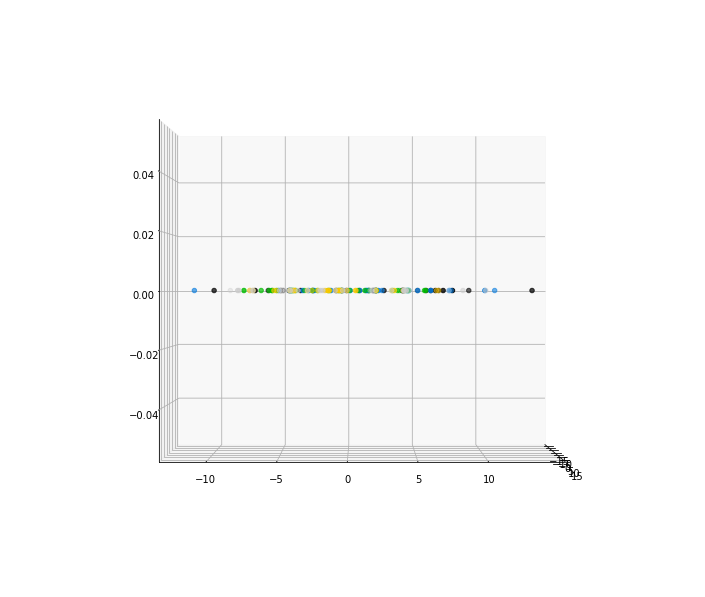

In [56]:
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)
ax.scatter(PCA_X[:, 0], PCA_X[:, 1], c=y, cmap=plt.cm.spectral)

Now as you can see, given the <b>same view</b>, there are <b>no datapoints</b> except on the <b>z = 0 plane</b>. Rather the <b>datapoints</b> are on the <b>other axes</b> confirming a <b>projection</b> from <b>3 features</b> to <b>2</b>. You can even look at the <b>shape</b> of <b>PCA_X</b> to show <b>2 features</b>.

In [57]:
PCA_X.shape

(150, 2)

You may wish to <b>change</b> the values of <b>elev</b> and <b>azim</b> if you would like to view the graph in <b>different perspectives</b>. <b>Elev</b> controls the <b>elevation</b> of the <b>z plane</b> and <b>azim</b> controls the <b>azimuth angle</b> in the <b>x,y plane</b>.